# Margaret Doyle
# AY250_HW1 
# SPRING 2022

## 1) Super-resolution imaging 

In [147]:
from PIL import Image
import numpy as np
import os
from scipy import signal
import scipy
import matplotlib.pyplot as plt
from numpy import unravel_index

#Getting first frame to use as reference 
array0 = Image.open(os.path.join('/Users/yyk_lab/Downloads/Data/', 'im2-0.png')).convert('L')
newsize0 = (np.size(array0)[0]*3, np.size(array0)[1]*3) 
im_new0 = array0.resize(newsize0) #Resize 
im_new0=np.array(im_new0)
im_new0 = im_new0 -np.mean(im_new0) #Subtract off mean 

#Adjust how much you want to crop image 
crop1=150
crop2=650

#Array which will store all shifted images 
master_array=[]

for path, Directory, files in os.walk('/Users/yyk_lab/Downloads/Data/'):
    for file in files:
        if file.startswith("im2"):
            array = Image.open(os.path.join('/Users/yyk_lab/Downloads/Data/', file)).convert('L')
         
            #Resize
            newsize = (np.size(array)[0]*3, np.size(array)[1]*3)
            im_new = array.resize(newsize) 
            
            #Subtract off mean
            im_new = im_new -np.mean(im_new) 
        
 
            #fftconvolve a crop of the two images and find offset 
            conv = scipy.signal.fftconvolve(np.asarray(im_new0)[crop1:crop2] , np.asarray(im_new)[::-1, ::-1][crop1:crop2] )
            offset =  np.array(unravel_index(np.argmax(conv), conv.shape))
            
            #Print offset
            mid = np.array(conv.shape)/2
            print("Offset for %s = %0.2f, %0.2f" %(file, (mid-offset)[0], (mid-offset)[1]))  
            
            #Shift each image 
            img_updated = scipy.ndimage.interpolation.shift(im_new, [-(mid[0]- offset[0]) , -(mid[1]- offset[1])  ])
            master_array.append(img_updated)
                  
            

Offset for im2-48.png = 56.50, 0.50
Offset for im2-74.png = -54.50, 57.50
Offset for im2-60.png = -87.50, 69.50
Offset for im2-61.png = 11.50, 0.50
Offset for im2-75.png = -132.50, -5.50
Offset for im2-49.png = 53.50, 0.50
Offset for im2-88.png = -3.50, 0.50
Offset for im2-63.png = -90.50, 87.50
Offset for im2-77.png = -135.50, 66.50
Offset for im2-76.png = -39.50, 9.50
Offset for im2-62.png = -12.50, 42.50
Offset for im2-89.png = -78.50, 54.50
Offset for im2-99.png = -156.50, 6.50
Offset for im2-66.png = -54.50, 144.50
Offset for im2-72.png = -141.50, 9.50
Offset for im2-73.png = -90.50, 108.50
Offset for im2-67.png = 53.50, 0.50
Offset for im2-98.png = 50.50, -5.50
Offset for im2-71.png = -78.50, 3.50
Offset for im2-65.png = -78.50, 6.50
Offset for im2-59.png = 86.50, 0.50
Offset for im2-58.png = -87.50, 24.50
Offset for im2-64.png = -111.50, 123.50
Offset for im2-70.png = -117.50, 0.50
Offset for im2-8.png = -126.50, 36.50
Offset for im2-17.png = -120.50, 72.50
Offset for im2-16.png

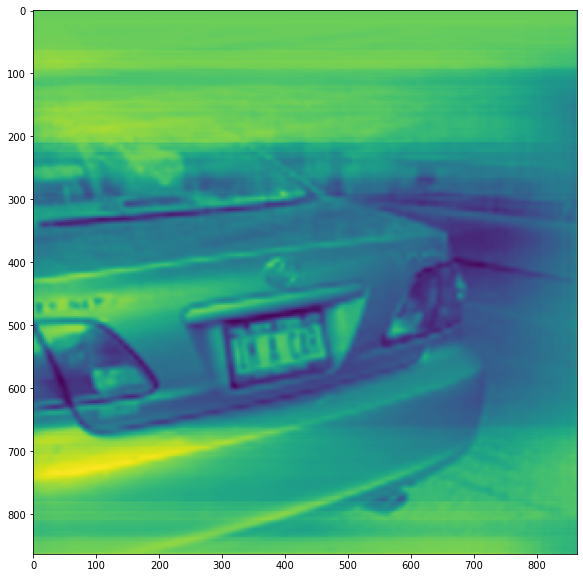

In [148]:
#Combine all registered images to form one image, license plate reads "Im A Car"
plt.figure(figsize=[10,10])
plt.imshow(np.mean(master_array,axis=0))

## 2) Spectral Audio Compression

In [149]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# we'll need some path manipulations later on
import os
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))
    
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x, Fs=2)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

In [150]:
Audio("data/voice.wav") #I found this only plays for me in Firefox

In [128]:
## Next, write function to compress a 1D signal by dropping a fraction of its spectrum

In [151]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    x_ = np.fft.fft(x)
    signal_sort_index = np.argsort(x_)
    drop_me=signal_sort_index[0:int(len(signal_sort_index)*fraction)]
    x_[drop_me]= 0
    x_approx = np.fft.ifft(x_)
    return x_approx

/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


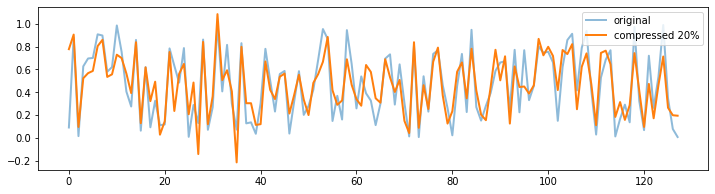

In [152]:
x = np.random.rand(128)
fraction = 0.2  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)
plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend()
plt.show()

In [153]:
# Compress an audio file by dropping fraction of its spectrum 

In [154]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    new_name = fname.split("/")[1][0:-4]
    new_fname = new_name + '_comp_' + '%0.2f' %fraction + '.wav'
    rate, x = scipy.io.wavfile.read(fname)
    x_approx = compress_signal(x, fraction)
    scipy.io.wavfile.write(new_fname , rate,x_approx.astype(np.int16))
    
    return rate, x, x_approx, new_fname

/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(10000.0, 60000.0)

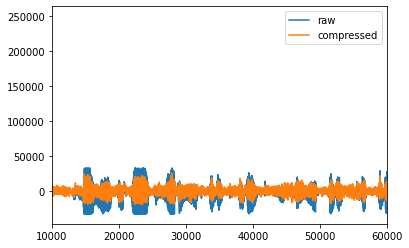

In [156]:
import scipy.io.wavfile
fraction = 0.3
fname = 'Data/Voice.wav'
rate, x, x_approx, new_fname = compress_wav(fname, fraction)

plt.figure()
plt.plot(x,label='raw')
plt.plot(x_approx, label='compressed')
plt.legend()
plt.xlim(10000,60000)


In [157]:
#Study effect of compressing input file at different ratios 

In [158]:
from collections import OrderedDict
voices = OrderedDict()

fname = 'Data/Voice.wav'
fraction=0.1
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0'] = [x,fname]
voices['0.1'] = [x_approx,new_fname]
fraction=0.5
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0.5'] = [x_approx,new_fname]
fraction=0.75
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0.75']= [x_approx,new_fname]
fraction=0.9
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0.9']= [x_approx,new_fname]
fraction=0.95
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0.95']= [x_approx,new_fname]
fraction=0.99
rate, x, x_approx, new_fname = compress_wav(fname, fraction)
voices['0.99'] = [x_approx,new_fname]

/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


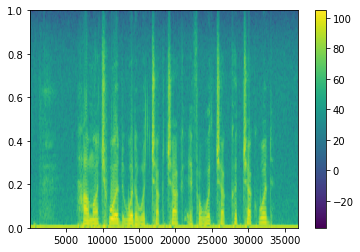

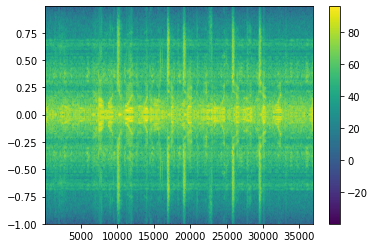

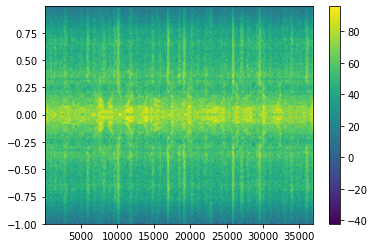

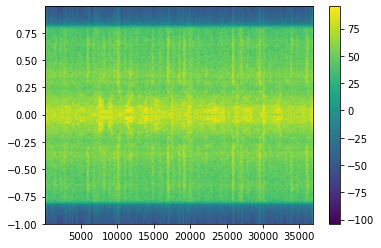

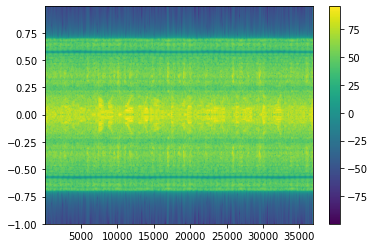

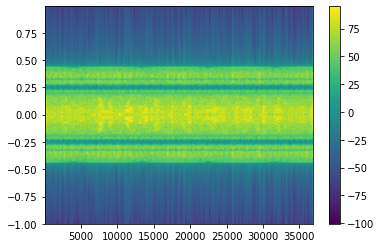

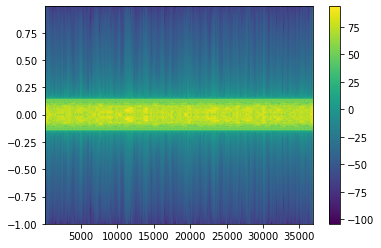

In [163]:
for key, value in voices.items():
    plt.figure()
    plt.specgram(value[0])
    plt.colorbar()
    plt.show()
    Audio(str(value[1]))

# Amplitude in spectrogram gets smaller and smaller as file is compressed further. 

# I can understand the audio up to 95% compression, if I wasn't already primed on what the audio was saying, I think the 99% compression would be fairly impossible to understand.

## 3) Armchair astronomer 

In [164]:
import pandas as pd
from dateutil.parser import parse
df = pd.read_csv('Data/merged_data.csv')
df['Week'] = pd.to_datetime(df['Week'])

df['Year']=""
df['Month']=""
df['Day']=""

i=0

#Separate week into year,month and data so it is easier to manipulate 
for d in df['Week']:
    df['Year'].iloc[i]= d.year
    df['Month'].iloc[i] = d.month
    df['Day'].iloc[i] = d.day
    i=i+1
df

/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Week,tennis,ice cream,full moon,Year,Month,Day
0,2017-01-29,17,11,10,2017,1,29
1,2017-02-05,13,11,40,2017,2,5
2,2017-02-12,15,12,11,2017,2,12
3,2017-02-19,16,13,9,2017,2,19
4,2017-02-26,16,12,11,2017,2,26
...,...,...,...,...,...,...,...
255,2021-12-19,12,14,31,2021,12,19
256,2021-12-26,11,16,8,2021,12,26
257,2022-01-02,13,14,11,2022,1,2
258,2022-01-09,15,16,16,2022,1,9


Period of moons orbit = 29.53 days


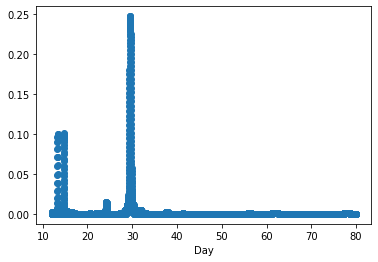

In [166]:
import scipy.signal as signal

#Frequencies passed to lombscargle are angular frequencies. 
#Data is sampled weekly, 260 times, over the course of several years. 
#First, I must convert this weekly data -> daily data

f = np.linspace(12, 80, 10000) #Looking for periodicity between 12 and 80 days, 
x = np.arange(len(df)) * 7
y = df['full moon']

#Generate input angular frequencies 
freq =  2 * np.pi /f 
pgram = signal.lombscargle(x,y ,freq , normalize=True)

plt.figure()

plt.plot(f, pgram,'o ')
print('Period of moons orbit = %0.2f days' % (f[np.argmax(pgram)]))
plt.xlabel('Day')
plt.show()

Length of year based off ice cream = 385.85 days


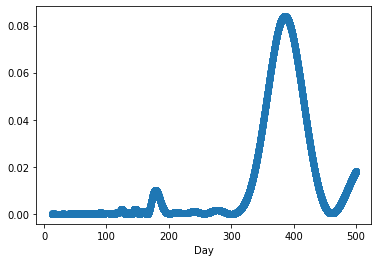

In [174]:
#I assume ice cream peaks once a year, during the summer. 
#I want to analyze the frequency of this peak, which should roughly tell me how long a year is 

f = np.linspace(12, 500, 10000)
y = df['ice cream']

#Frequencies passed to lombscargle are angular frequencies. 
#Data is sampled weekly, 260 times, over the course of several years. 
#First, convert this weekly data-> daily data
x = np.arange(len(df)) * 7 

#Generate input angular frequencies 
freq =  2 * np.pi /f 
pgram = signal.lombscargle(x,y ,freq , normalize=True)

plt.figure()
plt.plot(f, pgram,'o ')
print('Length of year based off ice cream = %0.2f days' % (f[np.argmax(pgram)]))
plt.xlabel('Day')
plt.show()